# Business Metric
* A business metric is a quantifiable measure businesses use to track, monitor and assess the success or failure of various business processes.

### Importing modules

In [1]:
import pandas as pd
import datetime as dt

### Importing data 
* Importing data containing event date, user id and their score event

In [2]:
df = pd.read_csv("nps.csv", parse_dates=["event_date"])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [3]:
sorted(df.score.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
year = df.event_date.dt.year
month = df.event_date.dt.month
# print(year, month)

In [5]:
df['yearmonth'] = year*100 + month
df.head()

,event_date,user_id,score,yearmonth
0,2020-01-01 19:00:51,290067447,8,202001
1,2020-01-02 17:34:43,223014806,10,202001
2,2020-01-02 19:11:55,187864388,10,202001
3,2020-01-02 19:27:00,318758952,8,202001
4,2020-01-02 21:42:19,189933311,0,202001


In [6]:
def categories(score):
    """Return NPS Category"""
    if score in range(0,7):
        return 'Detractor'
    elif score in (7,8):
        return 'Passive'
    else:
        return 'Promotor'

### Identifying NPS category
* Detractors (rating score 0-6) are unhappy customers who can damage your brand and impede growth through negative word-of mouth
* Passives (rating score 7-8) are satisfied but unenthusiastic customers who are vulnerable to competitive offerings
* Promoters (rating score 9-10) are loyal enthusiasts who will keep buying and fuel growth by referring to others

In [7]:
df['category'] = df.score.map(categories)
df.head()

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promotor
2,2020-01-02 19:11:55,187864388,10,202001,Promotor
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detractor


### Identifying monthly total for each category

In [8]:
nps = df.pivot_table(index= 'yearmonth', columns= 'category', aggfunc= 'size')
nps['total_responses'] = nps.sum(axis = 1)
nps

category,Detractor,Passive,Promotor,total_responses
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


### Calculating NPS (Net Promoted Score)
* NPS is a customer sucess metric that quantifies customer satisfaction
* NPS is then calculated as the percentage of promoters minus the percentage of detractors

In [9]:
nps['nps'] = (((nps['Promotor'] - nps['Detractor']) / nps['total_responses'])*100).astype('int')
nps.head()

category,Detractor,Passive,Promotor,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51


### Monthly NPS score

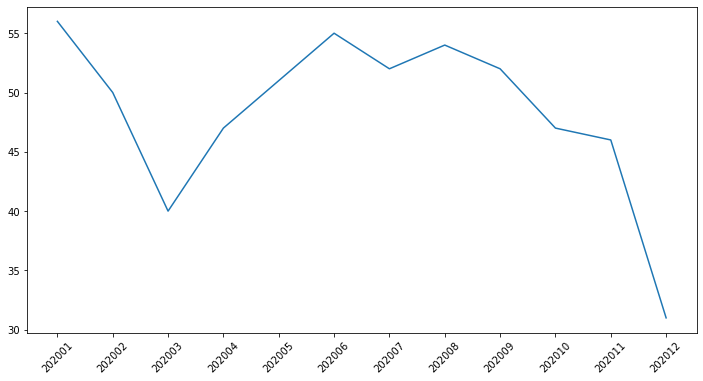

In [10]:
import matplotlib.pyplot as plt
ax = nps.reset_index().plot(kind = "line", x="yearmonth",y="nps",figsize=(12,6), legend = False)
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.set_xlabel("") # or ax.axes.get_xaxis().set_label_text("")
plt.show()